In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from random import choice
from keras import layers, utils, models, callbacks as cb

In [2]:
root = r'E:\\University\\Semester 6\\Grad\\forgery detection\\forgery detection neural network\\'
modelpath = os.path.join(root, 'tuned.h5')
model = models.load_model(modelpath)

In [3]:
# from typing import Iterable, Tuple
# from generate_dataset import TEMPLATE, original_images

# def all_image_paths() -> Iterable[Tuple[int, str]]:
#     for _, path in original_images("genuine"):
#         yield 1, path
#     for _, path in original_images("forged"):
#         yield 0, path

Path:  datasets\midv-2020-scanned\srb_passport\original_genuine\02.bmp
1/1 [==============================] - 0s 139ms/step
Genuine: 0.00%
Forged:  100.00%


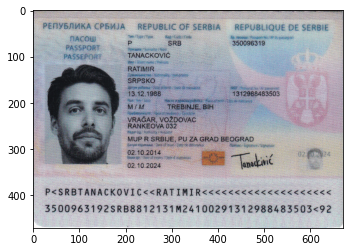

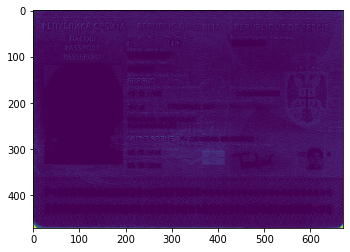

In [4]:
from colors import red, green
import matplotlib.pyplot as plt
has_correct_prediction = True

TEMPLATE = cv2.imread(r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\base_template.bmp')
seen = set()
# imgsrc = list(all_image_paths())
# while has_correct_prediction and len(seen) < len(imgsrc):

# actual_class, imgpath = choice(imgsrc)
# actual_class, imgpath = 1, r'E:\University\Semester 6\Grad\tile classification 2\tile classifciation\new resize\genuine\gen1.jpg'
# actual_class, imgpath = 1, r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\original_forged\001.jpg'
# actual_class, imgpath = 1, r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\original_genuine\09.bmp'
actual_class, imgpath = 0, r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\srb_passport\original_genuine\02.bmp'


# seen.add(imgpath)

print('Path: ', imgpath.replace("E:\\University\\Semester 6\\Grad\\forgery detection\\forgery detection neural network\\", ''))

img = cv2.imread(imgpath)
plt.figure('Original Document')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

sub = cv2.subtract(img, TEMPLATE)

plt.figure('Subtracted Document')
plt.imshow(cv2.cvtColor(sub, cv2.COLOR_BGR2GRAY))
# plt.imshow((sub))
sub = np.reshape(sub, (671, 471, 3))
sub = np.expand_dims(sub, axis=0)

genuine_activation: float = model.predict(sub)[0][0]
forged_activation = 1 - genuine_activation

predicted_class = 0 if forged_activation > genuine_activation else 1
has_correct_prediction = predicted_class == actual_class
# print(f'{actual_class=}; {predicted_class=}; {has_correct_prediction=}')
if actual_class == 1:
    if has_correct_prediction:
        print(green(f"Genuine: {genuine_activation:.2%}"))
    else:
        print(red(f"Genuine: {genuine_activation:.2%}"))
    print(f"Forged:  {forged_activation:.2%}")
else:
    print(f"Genuine: {genuine_activation:.2%}")
    if has_correct_prediction:
        print(green(f"Forged:  {forged_activation:.2%}"))
    else:
        print(red(f"Forged:  {forged_activation:.2%}"))